# Phosphor trend analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

measurements = pd.read_csv('measurements_with_postcode.csv')
measurements.Datum = pd.to_datetime(measurements.Datum, format='%Y-%m-%d')

subsidies = pd.read_csv('niedersachsen-subsidies.csv')
subsidies['postcode'] = subsidies.recipient_postcode.str.slice(3)

sub_without_measurement = [p for p in subsidies['postcode'].unique() if int(p) not in measurements['postcode'].unique()]
sub_with_measurement = [p for p in subsidies['postcode'].unique() if int(p) in measurements['postcode'].unique()]

In [24]:
measurements = pd.read_csv('~/phosphor.measurements.csv')

In [29]:
all_measurements = pd.read_csv('./phosphor.csv')

/home/aivuk/.virtualenvs/nabu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
all_measurements.Datum =  pd.to_datetime(all_measurements.Datum, format='%Y-%m-%d')

In [59]:
post_messtelle = {}


for i, df in measurements[['postcode', 'Messtelle']].iterrows():
    post_messtelle[df['Messtelle']] = df['postcode']

In [60]:
all_measurements['postcode'] = all_measurements.apply(lambda x: post_messtelle.get(int(x['Messtelle Nr.']), 0), axis=1)

# Total average along the years

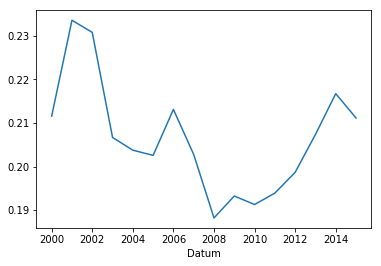

In [73]:
all_measurements[all_measurements['Parameter'] == 'Gesamtphosphor'].groupby(all_measurements.Datum.dt.year)['Messwert'].agg('mean').plot()

# Histogram of measurement values

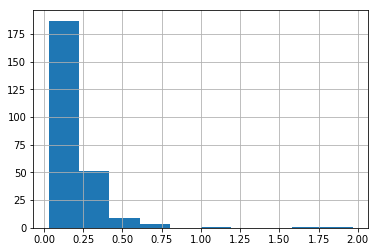

In [75]:
all_measurements[all_measurements['Parameter'] == 'Gesamtphosphor'].groupby(all_measurements.postcode)['Messwert'].agg('mean').hist()

# Top 25 postcode

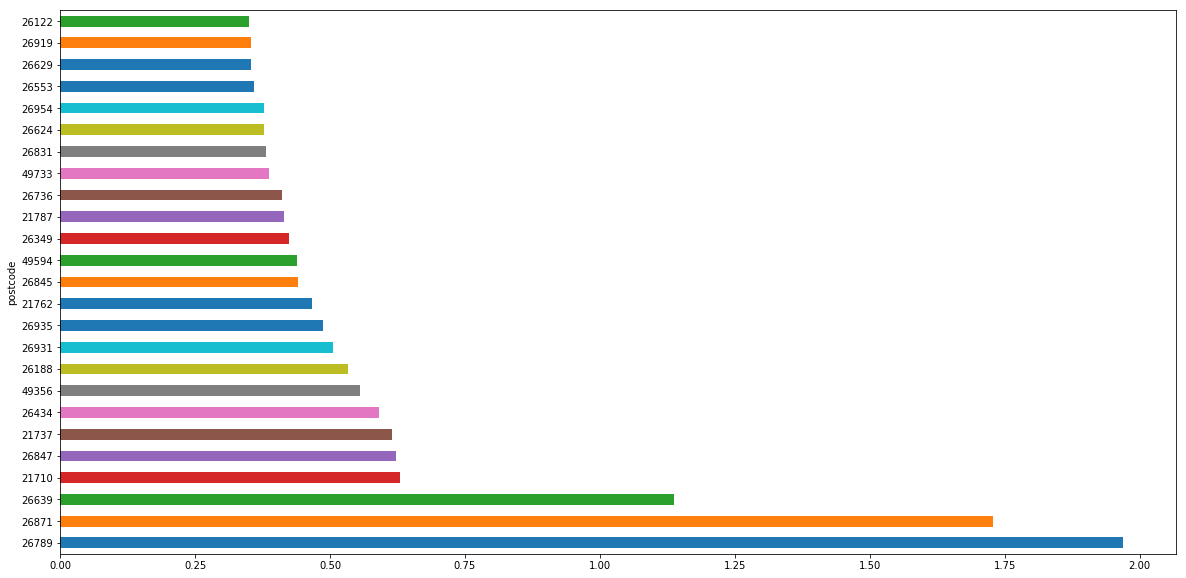

In [88]:
top_phosphor = all_measurements[all_measurements['Parameter'] == 'Gesamtphosphor'].groupby(all_measurements.postcode)['Messwert'].agg('mean').sort_values(ascending=False)
top_phosphor[:25].plot.barh(figsize=(20,10))

# Year trend top 10 postcode

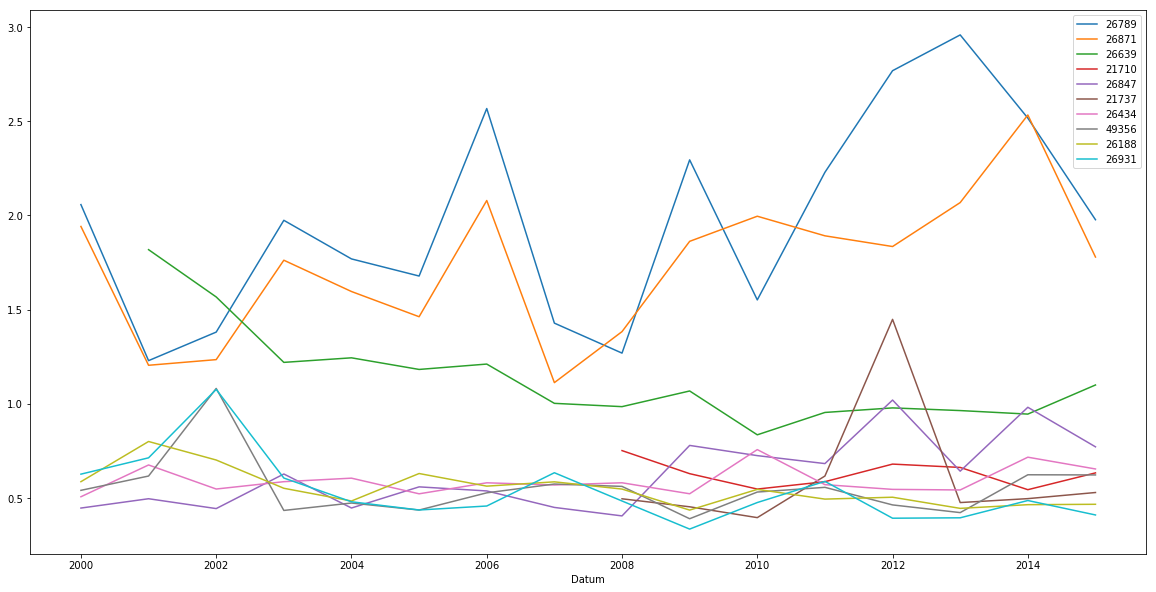

In [103]:
import matplotlib.pyplot as plt
for p in top_phosphor[:10].index:
    all_measurements[(all_measurements['Parameter'] == 'Gesamtphosphor') & (all_measurements.postcode == p)].groupby(all_measurements.Datum.dt.year)['Messwert'].agg('mean').plot(figsize=(20, 10))
plt.legend(top_phosphor[:10].index)

In [ ]:
import numpy as np
with_data = [p for p,v in phosphor.items() if not np.isnan(v)]
with_data

In [111]:
measurements_postcode = all_measurements[(all_measurements.postcode != 0) & (all_measurements['Parameter'] == 'Gesamtphosphor')][['postcode', 'Messwert']].groupby('postcode')['Messwert'].agg('mean')

,Unnamed: 0,recipient_name,recipient_id,recipient_postcode,recipient_location,scheme,amount,currency,year,country,postcode
0,25648,BG Linnemann GbR,DE-e443591d-1d5f-44ad-a69c-e7c2c0ff0a78,DE-19273,Amt Neuhaus,EGFL: Direktzahlungen,1759.30,EUR,2014,DE,19273
1,25707,"Fiedler, Thomas",DE-fb7d3570-df1a-4ff5-9f8d-7ed37ce41aa6,DE-19273,Bleckede,EGFL: Direktzahlungen,13634.35,EUR,2014,DE,19273
2,25708,"Fiedler, Thomas",DE-fb7d3570-df1a-4ff5-9f8d-7ed37ce41aa6,DE-19273,Bleckede,ELER: Agrarumweltmaßnahmen,8223.85,EUR,2014,DE,19273
3,25777,Elbauenschäferei GmbH & Co. KG,DE-4275781b-4e85-4ede-a63f-c727a3b0c60c,DE-19273,Amt Neuhaus,EGFL: Direktzahlungen,10588.46,EUR,2014,DE,19273
4,25805,Agrarvereinigung Darchau eG,DE-a62ffaad-b17c-4c6a-83d9-caf56f710597,DE-19273,Amt Neuhaus,EGFL: Direktzahlungen,262061.46,EUR,2014,DE,19273


In [138]:
values = []
for p in measurements_postcode.index:
    values += [(measurements_postcode[p], subsidies[subsidies.postcode == str(p)]['amount'].sum())]

In [170]:
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

lr = linear_model.LinearRegression()

meas_arr = np.array([v[0] for v in values])
amount_arr = np.array([v[1] for v in values])
    
lr.fit(amount_arr[:, np.newaxis], meas_arr)
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
np.corrcoef(amount_arr, meas_arr)

array([[1.        , 0.12040002],
       [0.12040002, 1.        ]])

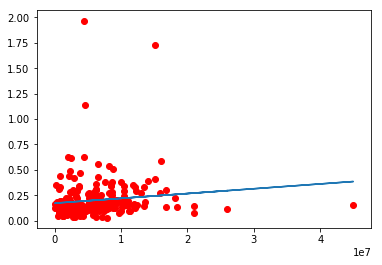

In [173]:
meas_pred = lr.predict(amount_arr[:, np.newaxis])
plt.plot(amount_arr, meas_pred)
plt.scatter(amount_arr,  meas_arr, color='red')